# Trotterization

In [ ]:
from qaravan.core.hamiltonians import TFI, XY, Heisenberg, ToricCode 
from qaravan.core.circuits import circ_to_mat
from qaravan.tensorQ.statevector_sim import all_zero_sv

import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
init_state = all_zero_sv(4)
tfi = TFI(4, 1.0, 1.0)
tfi.evolve(0.1, init_state, dense=True)

array([ 9.35964538e-01-2.91579873e-01j, -1.96358297e-02-9.62068821e-02j,
       -9.81792589e-03-9.71952728e-02j, -9.75196697e-03+1.31543302e-03j,
       -9.81792589e-03-9.71952728e-02j, -9.78500155e-03-5.89124360e-22j,
       -9.81805814e-03+3.27040141e-04j,  6.58265667e-05+9.83772523e-04j,
       -1.96358297e-02-9.62068821e-02j, -9.78497953e-03+9.88392876e-04j,
       -9.78500155e-03-6.73827581e-22j,  3.29243390e-05+9.85091633e-04j,
       -9.75196697e-03+1.31543302e-03j,  3.29243390e-05+9.85091633e-04j,
        6.58265667e-05+9.83772523e-04j,  9.84643105e-05-9.89837216e-06j])

Hamiltonian with 4 sites and nn ['zz'] coupling(s) and ['x'] field


Text(0.5, 1.0, 'TFI Error Scaling with Trotter Steps')

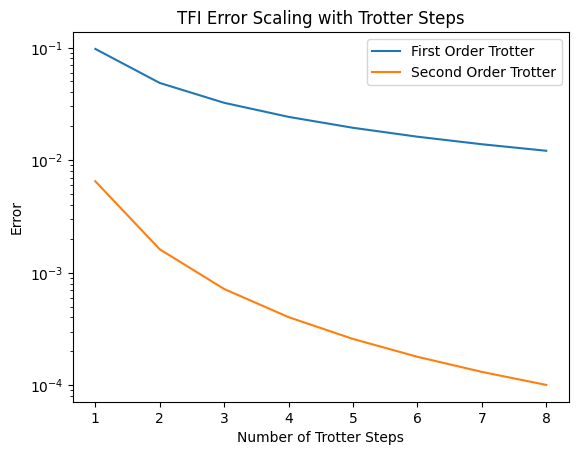

In [3]:
# test TFI error scaling with number of Trotter steps

n = 4
tfi = TFI(n, 1.0, 1.0)
print(tfi)

time = 0.1
true_mat = tfi.propagator(time, dense=True)

step_opts = [1, 2, 3, 4, 5, 6, 7, 8]
trotter_error1 = []
trotter_error2 = []
for num_steps in step_opts:
    circ = tfi.trotter_circ(time/num_steps, num_steps, order=1)
    trotter_mat = circ_to_mat(circ, n)
    err = np.linalg.norm(true_mat - trotter_mat)
    trotter_error1.append(err)

    circ = tfi.trotter_circ(time/num_steps, num_steps, order=2)
    trotter_mat = circ_to_mat(circ, n)
    err = np.linalg.norm(true_mat - trotter_mat)
    trotter_error2.append(err)

plt.plot(step_opts, trotter_error1, label='First Order Trotter')
plt.plot(step_opts, trotter_error2, label='Second Order Trotter')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.title('TFI Error Scaling with Trotter Steps')

Hamiltonian with 4 sites and nn ['xx', 'yy'] coupling(s) and ['z'] field


Text(0.5, 1.0, 'XY Error Scaling with Trotter Steps')

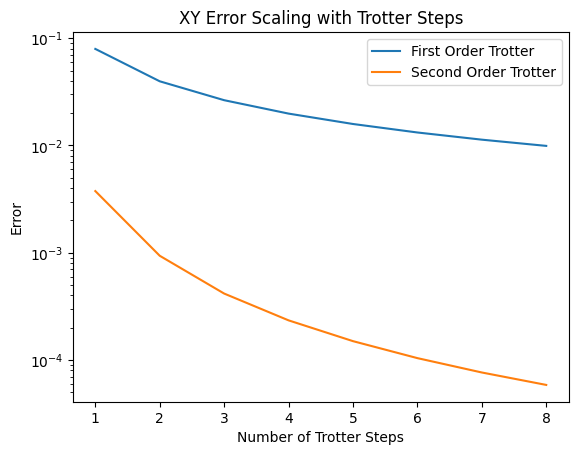

In [4]:
# test XY error scaling with number of Trotter steps

n = 4
xy = XY(n, 1.0)  # no field
print(xy)

time = 0.1
true_mat = xy.propagator(time, dense=True)

step_opts = [1, 2, 3, 4, 5, 6, 7, 8]
trotter_error1 = []
trotter_error2 = []
for num_steps in step_opts:
    circ = xy.trotter_circ(time/num_steps, num_steps, order=1)
    trotter_mat = circ_to_mat(circ, n)
    err = np.linalg.norm(true_mat - trotter_mat)
    trotter_error1.append(err)

    circ = xy.trotter_circ(time/num_steps, num_steps, order=2)
    trotter_mat = circ_to_mat(circ, n)
    err = np.linalg.norm(true_mat - trotter_mat)
    trotter_error2.append(err)

plt.plot(step_opts, trotter_error1, label='First Order Trotter')
plt.plot(step_opts, trotter_error2, label='Second Order Trotter')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.title('XY Error Scaling with Trotter Steps')

Hamiltonian with 4 sites and nn ['xx', 'yy', 'zz'] coupling(s) and ['z'] field


Text(0.5, 1.0, 'Heisenberg Error Scaling with Trotter Steps')

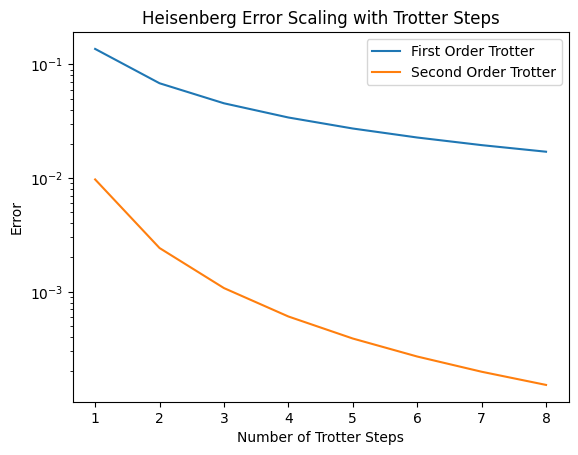

In [5]:
# test Heisenberg error scaling with number of Trotter steps

n = 4
heisenberg = Heisenberg(n, 1.0, 1.0, 1.0) # no field
print(heisenberg)

time = 0.1
true_mat = heisenberg.propagator(time, dense=True)

step_opts = [1, 2, 3, 4, 5, 6, 7, 8]
trotter_error1 = []
trotter_error2 = []

for num_steps in step_opts:
    circ = heisenberg.trotter_circ(time/num_steps, num_steps, order=1)
    trotter_mat = circ_to_mat(circ, n)
    err = np.linalg.norm(true_mat - trotter_mat)
    trotter_error1.append(err)

    circ = heisenberg.trotter_circ(time/num_steps, num_steps, order=2)
    trotter_mat = circ_to_mat(circ, n)
    err = np.linalg.norm(true_mat - trotter_mat)
    trotter_error2.append(err)

plt.plot(step_opts, trotter_error1, label='First Order Trotter')
plt.plot(step_opts, trotter_error2, label='Second Order Trotter')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.title('Heisenberg Error Scaling with Trotter Steps')

In [6]:
# J1-J2 error scaling


In [7]:
# need to do more detailed testing of the trotter circuit with different orders; specifically match the decay rate with the order

# Complexity of ground state search with sprase Hamiltonian matrix

In [53]:
import time
from qaravan.core.hamiltonians import TFI
import matplotlib.pyplot as plt

In [54]:
n_opts = np.arange(2, 13)
times = []
for n in n_opts:
    tfi = TFI(n, h=0.5)
    start_time = time.time()
    tfi.ground()
    end_time = time.time()
    times.append(end_time - start_time)

In [55]:
log_times = np.log(times)
# fit a low degree polynomial to the log times
coeffs = np.polyfit(n_opts, log_times, 3)
def predict_time(n):
    return np.exp(np.polyval(coeffs, n))

plt.plot(n_opts, times, label='Actual Times')
plt.plot(np.arange(2,18), [predict_time(n) for n in np.arange(2,18)], label='Predicted Times')

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

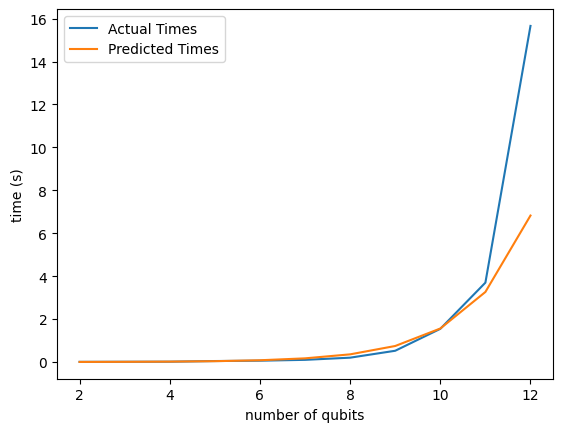

In [ ]:
log_times = np.log(times)
coefficients = np.polyfit(n_opts, log_times, 1)
def predict_time(n):
    return np.exp(coefficients[0] * n + coefficients[1])
    
plt.plot(n_opts, times, label='Actual Times')
plt.plot(n_opts, [predict_time(n) for n in n_opts], label='Predicted Times')
plt.xlabel('number of qubits')
plt.ylabel('time (s)')
plt.legend()

# Test toric code

In [1]:
from qaravan.core.hamiltonians import ToricCode
from qaravan.tensorQ.density_matrix_sim import rdm_from_sv, vN_entropy
import numpy as np

In [2]:
def top_entropy(gstate, regions): 
    rdm_A = rdm_from_sv(gstate, regions[0])
    rdm_B = rdm_from_sv(gstate, regions[1])
    rdm_C = rdm_from_sv(gstate, regions[2])
    rdm_AB = rdm_from_sv(gstate, regions[0]+regions[1])
    rdm_BC = rdm_from_sv(gstate, regions[1]+regions[2])
    rdm_AC = rdm_from_sv(gstate, regions[0]+regions[2])
    rdm_ABC = rdm_from_sv(gstate, regions[0]+regions[1]+regions[2])

    sA = vN_entropy(rdm_A)
    sB = vN_entropy(rdm_B)
    sC = vN_entropy(rdm_C)
    sAB = vN_entropy(rdm_AB)
    sBC = vN_entropy(rdm_BC)
    sAC = vN_entropy(rdm_AC)
    sABC = vN_entropy(rdm_ABC)
    return np.real(sA + sB + sC - sAB - sBC - sAC + sABC)

In [3]:
ham = ToricCode(2,3)
_, gs = ham.ground()

In [4]:
A = [0,6]
B = [3,9]
C = [4,7]
regions = [A, B, C]
top_entropy(gs, regions)

np.float64(-0.6931471805599396)

In [8]:
A = [0,6]
B = [4,7]
C = [3,9]
regions = [A, B, C]
top_entropy(gs, regions)

np.float64(-0.6931471805599396)

In [19]:
# if A,B,C don't meet at a point, TEE is less than expected
A = [0,6]
B = [3,9]
C = [1,4]
regions = [A, B, C]
top_entropy(gs, regions)

np.float64(-0.6401544518088915)

In [17]:
# if regions wrap around the boundary, TEE is less than expected
A = [6,8]
B = [3,9]
C = [1,7]
regions = [A, B, C]
top_entropy(gs, regions)

np.float64(-1.2791812252014143)

# Test Kagome model

In [2]:
from qaravan.core.hamiltonians import ChiralHeisenberg

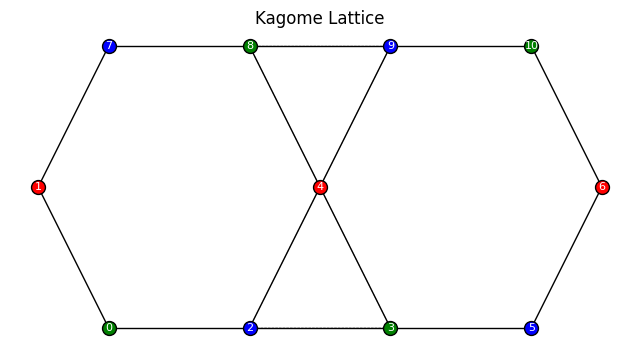

In [3]:
row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,7,11,14]
ham = ChiralHeisenberg(row_layout, sp=sp)
ham.lattice.plot(save_path='11qubits.pdf')

# Test grouping of terms in ChiralHeisenberg

In [1]:
from qaravan.core.hamiltonians import ChiralHeisenberg, terms_to_matrix
import numpy as np

In [2]:
def build_groups(ham): 
    """ same grouping as ham.grouped_terms, but returns a list of groups of (coefficient, active_sites, local_ops) allowing us to call terms_to_matrix on each term """
    triangle_groups = []
    triangle_edges = []
    for t in ham.lattice.triangle_terms:
        edges = [(t[0], t[1]), (t[1], t[2]), (t[0], t[2])]
        terms = ham.pairwise_terms(edges) + ham.chiral_terms(t)
        triangle_groups.append(terms)
        triangle_edges.extend(edges)
    
    edge_groups = []
    for pair in ham.lattice.nn_pairs:
        if pair not in triangle_edges:
            edge_groups.append(ham.pairwise_terms([pair]))

    return triangle_groups, edge_groups

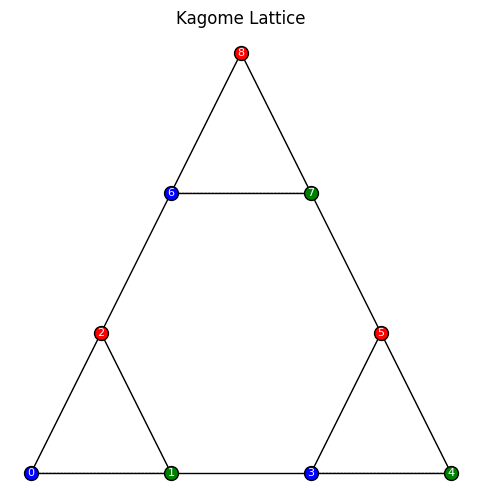

In [3]:
row_layout = [{'num_cells': 2, 'shift': 0.0},
             {'num_cells': 1, 'shift': 0.5}]

theta = 0.35
jh = np.cos(theta)
jc = np.sin(theta)

sp = []
ham = ChiralHeisenberg(row_layout, sp=sp, jx=jh, jy=jh, jz=jh, chiral_strength=jc)
ham.lattice.plot()

In [4]:
triangle_groups, edge_groups = build_groups(ham)

mat_old = ham.matrix(dense=True)
group_mats = [terms_to_matrix(terms, ham.num_sites) for terms in triangle_groups + edge_groups]
np.allclose(mat_old, sum(group_mats))

True

# Ground state of Hamiltonian

In [13]:
from qaravan.tensorQ.statevector_sim import op_action, rand_sv
from qaravan.core.hamiltonians import ChiralHeisenberg
import numpy as np
from scipy.sparse.linalg import eigsh, LinearOperator

def ham_action(grouped_terms, sv, local_dim=2): 
    result = np.zeros_like(sv, dtype=complex)
    for indices, mat in grouped_terms: 
        result += op_action(mat, indices, sv, local_dim=local_dim)
    return result

def ground(ham):
    grouped_terms = ham.grouped_terms()
    dim = 2**ham.num_sites

    def mv(v):
        return ham_action(grouped_terms, v)

    H_linop = LinearOperator(shape=(dim, dim), matvec=mv, dtype=np.complex128)
    vals, vecs = eigsh(H_linop, k=1, which='SA')  # 'SA' = smallest algebraic
    return vals[0], vecs[:, 0]

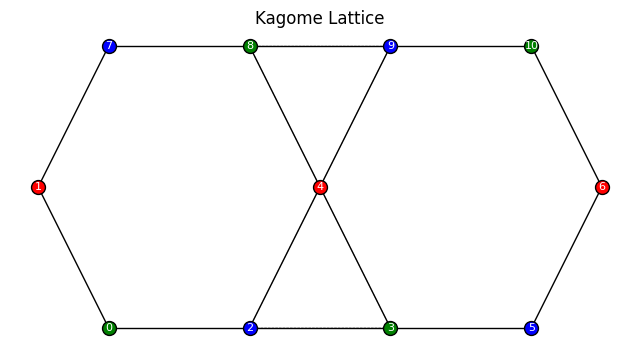

In [14]:
row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]

theta = 0.35*np.pi
jh = np.cos(theta)
jc = np.sin(theta)

sp = [0,7,11,14]
ham = ChiralHeisenberg(row_layout, sp=sp, jx=jh, jy=jh, jz=jh, chiral_strength=jc)
ham.lattice.plot()

In [15]:
mat = ham.matrix(dense=True)
grouped_terms = ham.grouped_terms()
sv = rand_sv(ham.num_sites)

In [ ]:
import time

start_time = time.time()
result_old = mat @ sv
end_time = time.time()
print(f"Time for mat @ sv: {end_time - start_time:.6f} seconds")

start_time = time.time()
result_new = ham_action(grouped_terms, sv)
end_time = time.time()
print(f"Time for ham_action(grouped_terms, sv): {end_time - start_time:.6f} seconds")

np.allclose(ham_action(grouped_terms, sv), mat_old @ sv)

Time for mat @ sv: 0.012598 seconds
Time for ham_action(grouped_terms, sv): 0.003754 seconds


True

In [22]:
start_time = time.time()
ge_old, gstate_old = ham.ground()
end_time = time.time()
print(f"Time for old ground method: {end_time - start_time:.6f} seconds")

start_time = time.time()
ge_new, gstate_new = ground(ham)  # using the new method with LinearOperator
end_time = time.time()
print(f"Time for new ground method: {end_time - start_time:.6f} seconds")

np.allclose(gstate_old, gstate_new), np.allclose(ge_old, ge_new)

Time for old ground method: 7.410967 seconds
Time for new ground method: 0.624949 seconds


(False, True)

In [23]:
gstate_old.conj().T @ mat @ gstate_old, gstate_new.conj().T @ mat @ gstate_new, ge_old, ge_new

(array([[-2.51160724-1.38777878e-17j]]),
 np.complex128(-2.511607237705519+5.551115123125783e-17j),
 array([-2.51160724]),
 np.float64(-2.511607237705518))

# TEE of large enough chiral Heisenberg model